In [230]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!pip install plotly

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [5]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [72]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
31509,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
df.shape

(42000, 785)

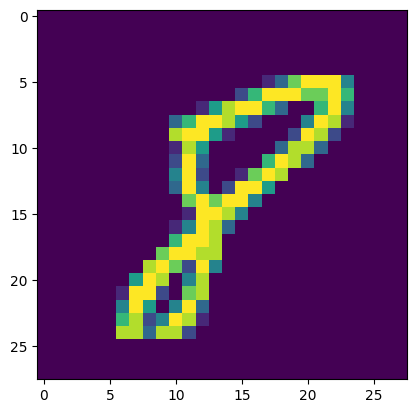

In [75]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[18306,1:].values.reshape(28,28))

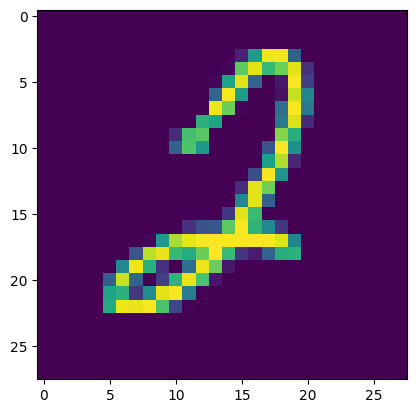

In [76]:
plt.imshow(df.iloc[15645,1:].values.reshape(28,28))

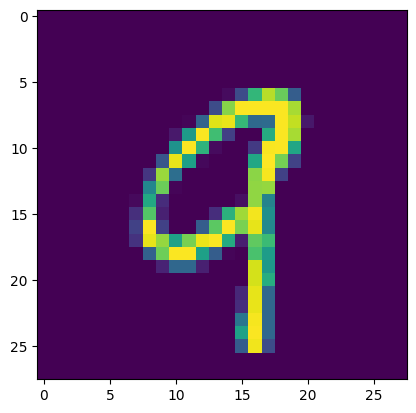

In [77]:
plt.imshow(df.iloc[41999,1:].values.reshape(28,28))

In [78]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [80]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
34941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
X_train.shape

(33600, 784)

In [82]:
y_train

34941    6
24433    5
24432    3
8832     4
30291    7
        ..
6265     9
11284    9
38158    2
860      6
15795    0
Name: label, Length: 33600, dtype: int64

In [83]:
y_train.shape

(33600,)

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
knn = KNeighborsClassifier()

In [86]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [87]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

13.35707974433899


In [88]:
from sklearn.metrics import accuracy_score

In [89]:
accuracy_score(y_test,y_pred)

0.9648809523809524

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [91]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [92]:
from sklearn.decomposition import PCA

In [218]:
pca = PCA(n_components=80)

In [219]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [220]:
X_train_trf.shape

(33600, 80)

In [221]:
knn = KNeighborsClassifier()

In [222]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [223]:
y_pred = knn.predict(X_test_trf)

In [224]:
accuracy_score(y_test,y_pred)

0.9545238095238096

In [238]:
import plotly.express as px

y_train_trf = y_train.astype(str)
fig = px.scatter(
    x=X_train_trf[:,0],
    y=X_train_trf[:,1],
    color=y_train_trf,
    color_discrete_sequence=px.colors.qualitative.G10
)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [239]:
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [240]:
X_train_trf

array([[-2.71862493, -0.48975143,  1.13557356],
       [-0.67695609, -6.75360967, -2.3360644 ],
       [-3.03325168,  6.50969527,  7.49181208],
       ...,
       [ 2.1488194 ,  0.78074296, -0.74750385],
       [ 1.05958195,  0.94780705,  3.94985391],
       [17.70263108,  1.96197462, -4.9436635 ]])

In [241]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df,x=X_train_trf[:,0],y=X_train_trf[:,1],z=X_train_trf[:,2],
                   color=y_train_trf)
fig.update_layout(
    margin=dict(l=20,r=20,t=20,b=20)
)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

